In [1]:
# 导入数据
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
X = iris.data[:,:2]
Y = iris.target

# 将数据划分为训练集和测试集
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

# 导入模型，调用逻辑回归 LogisticRegression()函数
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2',solver='newton-cg',multi_class='multinomial')
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [4]:
print(type(X))
print(X[0])

<class 'numpy.ndarray'>
[5.1 3.5]


In [5]:
# 对模型进行评估
print('逻辑回归训练集准确率：%.3f'% lr.score(x_train,y_train))
print('逻辑回归测试集准确率：%.3f'% lr.score(x_test,y_test))
from sklearn import metrics
pred = lr.predict(x_test)
accuracy = metrics.accuracy_score(y_test,pred)
print('逻辑回归模型准确率：%.3f'% accuracy)

逻辑回归训练集准确率：0.850
逻辑回归测试集准确率：0.733
逻辑回归模型准确率：0.733


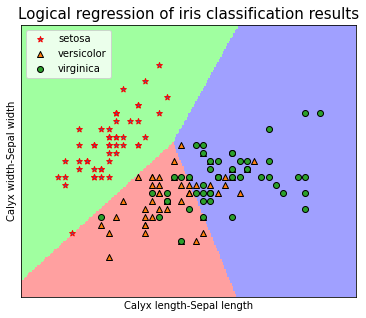

In [6]:
import numpy as np
lx1, rx1 = X[:,0].min() - 0.5,X[:,0].max() + 0.5
lx2, rx2 = X[:,1].min() - 0.5,X[:,1].max() + 0.5
h = 0.02
x1,x2 = np.meshgrid(np.arange(lx1,rx1,h),np.arange(lx2,rx2,h))
grid_test = np.stack((x1.flat,x2.flat),axis = 1)
grid_pred = lr.predict(grid_test)
grid_pred = grid_pred.reshape(x1.shape)
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.figure(1,figsize=(6,5))
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
plt.pcolormesh(x1,x2,grid_pred,cmap=cm_light)
plt.scatter(X[:50, 0], X[:50, 1], marker = '*', edgecolors='red', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], marker = '^', edgecolors='k', label='versicolor')
plt.scatter(X[100:150, 0], X[100:150, 1], marker = 'o', edgecolors='k', label='virginica')
plt.xlabel('Calyx length-Sepal length')
plt.ylabel('Calyx width-Sepal width')
plt.legend(loc = 2)
plt.xlim(lx1.min(), rx1.max())
plt.ylim(lx2.min(), rx2.max())
plt.title("Logical regression of iris classification results", fontsize = 15)
plt.xticks(())
plt.yticks(())
plt.grid()
plt.show()